# Import Library and Data

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Additional Library
import matplotlib.dates as mdates

In [ ]:
files = os.listdir("/Users/Wayne/Desktop/CentraleSupelec & ESSEC/Lecture/M2/M2_T2/Hackathon/data")
files

['weather_data.csv',
 'waiting_times.csv',
 'parade_night_show.xlsx',
 'glossary.xlsx',
 'entity_schedule.csv',
 'link_attraction_park.csv',
 'attendance.csv']

In [ ]:
weather_data_df = pd.read_csv(f'data/{files[0]}')
waiting_times_df = pd.read_csv(f'data/{files[1]}')
entity_schedule_df = pd.read_csv(f'data/{files[4]}')
link_attraction_park_df = pd.read_csv(f'data/{files[5]}', sep=";")
attendance_df = pd.read_csv(f'data/{files[6]}')

parade_night_show_df = pd.read_excel(f'data/{files[2]}')

# Data Basic Information

### Weather Data

In [ ]:
weather_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207264 entries, 0 to 207263
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt                   207264 non-null  int64  
 1   dt_iso               207264 non-null  object 
 2   timezone             207264 non-null  int64  
 3   city_name            207264 non-null  object 
 4   lat                  207264 non-null  float64
 5   lon                  207264 non-null  float64
 6   temp                 207264 non-null  float64
 7   visibility           0 non-null       float64
 8   dew_point            207264 non-null  float64
 9   feels_like           207264 non-null  float64
 10  temp_min             207264 non-null  float64
 11  temp_max             207264 non-null  float64
 12  pressure             207264 non-null  int64  
 13  sea_level            0 non-null       float64
 14  grnd_level           0 non-null       float64
 15  humidity         

In [ ]:
weather_data_df = weather_data_df[["dt", "dt_iso", "temp", "dew_point", "feels_like", "humidity",
                                   "rain_1h", "snow_1h", "weather_main","weather_description"]]

In [ ]:
weather_data_df['dt_iso'] = pd.to_datetime(weather_data_df['dt_iso'].str.replace(r'\+\d+\sUTC', '', regex=True))

In [ ]:
weather_data_df.head()

,dt,dt_iso,temp,dew_point,feels_like,humidity,rain_1h,snow_1h,weather_main,weather_description
0,915148800,1999-01-01 00:00:00,8.33,3.39,5.28,71,NaN,NaN,Clear,sky is clear
1,915152400,1999-01-01 01:00:00,8.08,3.54,5.18,73,NaN,NaN,Clear,sky is clear
2,915156000,1999-01-01 02:00:00,8.08,4.11,5.38,76,NaN,NaN,Clouds,few clouds
3,915159600,1999-01-01 03:00:00,7.31,3.73,4.42,78,NaN,NaN,Clouds,scattered clouds
4,915163200,1999-01-01 04:00:00,6.91,3.53,4.00,79,NaN,NaN,Clouds,broken clouds


### Log Data for each event by each attraction

In [ ]:
waiting_times_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3509324 entries, 0 to 3509323
Data columns (total 14 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   WORK_DATE                 object 
 1   DEB_TIME                  object 
 2   DEB_TIME_HOUR             int64  
 3   FIN_TIME                  object 
 4   ENTITY_DESCRIPTION_SHORT  object 
 5   WAIT_TIME_MAX             int64  
 6   NB_UNITS                  float64
 7   GUEST_CARRIED             float64
 8   CAPACITY                  float64
 9   ADJUST_CAPACITY           float64
 10  OPEN_TIME                 int64  
 11  UP_TIME                   int64  
 12  DOWNTIME                  int64  
 13  NB_MAX_UNIT               float64
dtypes: float64(5), int64(5), object(4)
memory usage: 374.8+ MB


In [ ]:
waiting_times_df.head()

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT
0,2018-01-01,2018-01-01 21:00:00.000,21,2018-01-01 21:15:00.000,Roller Coaster,0,2.0,0.0,0.000,0.00,0,0,0,2.0
1,2018-01-01,2018-01-01 19:30:00.000,19,2018-01-01 19:45:00.000,Bumper Cars,5,18.0,148.0,254.749,254.75,15,15,0,18.0
2,2018-01-01,2018-01-01 22:30:00.000,22,2018-01-01 22:45:00.000,Rapids Ride,0,1.0,0.0,0.000,0.00,0,0,0,2.0
3,2018-01-01,2018-01-01 12:45:00.000,12,2018-01-01 13:00:00.000,Crazy Dance,5,1.0,46.0,250.001,250.00,15,15,0,1.0
4,2018-01-01,2018-01-01 17:00:00.000,17,2018-01-01 17:15:00.000,Skyway,5,15.0,92.0,211.500,198.25,15,15,0,16.0


In [ ]:
waiting_times_df.describe()

,DEB_TIME_HOUR,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT
count,3.509324e+06,3.509324e+06,3.509324e+06,3.509324e+06,3.509324e+06,3.509324e+06,3.509324e+06,3.509324e+06,3.509324e+06,3.509324e+06
mean,1.549995e+01,1.356083e+01,1.271980e+01,7.526034e+01,1.641373e+02,1.429673e+02,7.938917e+00,7.646112e+00,2.928051e-01,1.979631e+01
std,4.031111e+00,2.103223e+01,2.286562e+01,1.063368e+02,1.948027e+02,1.778541e+02,7.449887e+00,7.431283e+00,1.958422e+00,2.816274e+01
min,9.000000e+00,0.000000e+00,-1.000000e+00,-4.780000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.500000e+01,0.000000e+00,0.000000e+00
25%,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
50%,1.500000e+01,5.000000e+00,4.000000e+00,1.100000e+01,1.012500e+02,7.500000e+01,1.500000e+01,1.300000e+01,0.000000e+00,1.100000e+01
75%,1.900000e+01,2.000000e+01,1.600000e+01,1.300000e+02,2.882500e+02,2.437500e+02,1.500000e+01,1.500000e+01,0.000000e+00,2.000000e+01
max,2.200000e+01,3.000000e+02,1.300000e+02,1.500000e+04,7.560000e+02,7.560000e+02,1.500000e+01,1.500000e+01,3.000000e+01,1.300000e+02


In [ ]:
(pd.to_datetime(waiting_times_df["FIN_TIME"]) - pd.to_datetime(waiting_times_df["DEB_TIME"])).describe()

count            3509324
mean     0 days 00:15:00
std      0 days 00:00:00
min      0 days 00:15:00
25%      0 days 00:15:00
50%      0 days 00:15:00
75%      0 days 00:15:00
max      0 days 00:15:00
dtype: object

**Duration of each round of every attraction is 15 mins**

### Attraction & Park Operation Log (Closed or Open)

In [ ]:
entity_schedule_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38307 entries, 0 to 38306
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   REF_CLOSING_DESCRIPTION   4472 non-null   object
 1   ENTITY_DESCRIPTION_SHORT  38307 non-null  object
 2   ENTITY_TYPE               38307 non-null  object
 3   DEB_TIME                  38307 non-null  object
 4   FIN_TIME                  38307 non-null  object
 5   UPDATE_TIME               38307 non-null  object
 6   WORK_DATE                 38307 non-null  object
dtypes: object(7)
memory usage: 2.0+ MB


In [ ]:
entity_schedule_df.head()

,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE
0,NaN,Tivoli Gardens,PARK,2018-11-19 10:00:00.000,2018-11-19 18:00:00.000,2018-11-20 08:24:32.000,2018-11-19
1,NaN,Dizzy Dropper,ATTR,2022-04-07 08:30:00.000,2022-04-07 22:04:00.000,2022-04-08 08:00:30.000,2022-04-07
2,NaN,Sling Shot,ATTR,2018-03-28 08:37:00.000,2018-03-28 18:12:00.000,2018-03-29 08:24:37.000,2018-03-28
3,NaN,Gondola,ATTR,2019-04-11 09:55:00.000,2019-04-11 20:19:00.000,2019-04-12 08:59:29.000,2019-04-11
4,NaN,Monorail,ATTR,2019-06-29 08:30:00.000,2019-06-29 20:35:00.000,2019-06-30 08:14:16.000,2019-06-29


In [ ]:
entity_schedule_df[entity_schedule_df["REF_CLOSING_DESCRIPTION"].notnull()].head()

,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE
5,Fermeture Réhab,Top Spin,ATTR,2019-04-07 23:59:00.000,2019-04-07 23:59:00.000,2019-04-08 07:40:04.000,2019-04-07
12,Fermeture Réhab,Kiddie Coaster,ATTR,2018-02-21 23:59:00.000,2018-02-21 23:59:00.000,2018-02-22 08:36:23.000,2018-02-21
14,Fermeture Opérationnelle,Oz Theatre,ATTR,2018-09-04 23:59:00.000,2018-09-04 23:59:00.000,2018-09-05 08:12:54.000,2018-09-04
18,Fermeture Opérationnelle,Oz Theatre,ATTR,2018-06-24 23:59:00.000,2018-06-24 23:59:00.000,2018-06-25 08:03:37.000,2018-06-24
30,Fermeture Réhab,Top Spin,ATTR,2019-08-28 23:59:00.000,2019-08-28 23:59:00.000,2019-08-29 09:04:03.000,2019-08-28


### Link between Attraction and Park

In [ ]:
link_attraction_park_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ATTRACTION  39 non-null     object
 1   PARK        39 non-null     object
dtypes: object(2)
memory usage: 756.0+ bytes


In [ ]:
link_attraction_park_df.head()

,ATTRACTION,PARK
0,Aeroplane Ride,Tivoli Gardens
1,Bumper Cars,PortAventura World
2,Bungee Jump,PortAventura World
3,Circus Train,PortAventura World
4,Crazy Bus,Tivoli Gardens


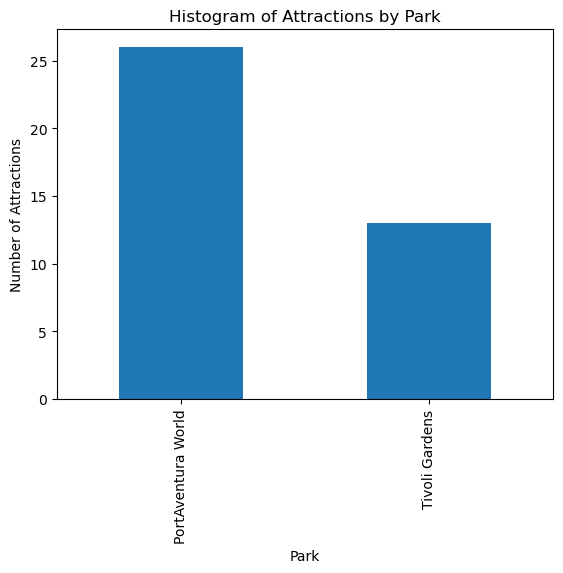

In [ ]:
link_attraction_park_df['PARK'].value_counts().plot(kind='bar')
plt.title('Histogram of Attractions by Park')
plt.xlabel('Park')
plt.ylabel('Number of Attractions')
plt.show()

In [ ]:
# Filter the DataFrame for each park
tivoli_df = link_attraction_park_df[link_attraction_park_df['PARK'] == 'Tivoli Gardens']
portaventura_df = link_attraction_park_df[link_attraction_park_df['PARK'] == 'PortAventura World']

# Merge the two DataFrames on the 'ATTRACTION' column to find common attractions
common_attractions = pd.merge(tivoli_df, portaventura_df, on='ATTRACTION', how='inner')

# Check if there are any common attractions
if not common_attractions.empty:
    print("Common attractions found:")
    print(common_attractions['ATTRACTION'])
else:
    print("No common attractions between the two parks.")

No common attractions between the two parks.


### Total Number Attendance for each day by PARK

In [ ]:
attendance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2367 entries, 0 to 2366
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   USAGE_DATE     2367 non-null   object
 1   FACILITY_NAME  2367 non-null   object
 2   attendance     2367 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 55.6+ KB


In [ ]:
attendance_df.head()

,USAGE_DATE,FACILITY_NAME,attendance
0,2018-06-01,PortAventura World,46804
1,2018-06-01,Tivoli Gardens,20420
2,2018-06-02,PortAventura World,57940
3,2018-06-02,Tivoli Gardens,29110
4,2018-06-03,PortAventura World,44365


In [ ]:
attendance_df.tail()

,WORK_DATE,PARK,attendance
2362,2022-07-24,Tivoli Gardens,26798
2363,2022-07-25,PortAventura World,53764
2364,2022-07-25,Tivoli Gardens,27061
2365,2022-07-26,PortAventura World,26391
2366,2022-07-26,Tivoli Gardens,14882


### Parade Show

In [ ]:
parade_night_show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  671 non-null    int64         
 1   WORK_DATE   671 non-null    datetime64[ns]
 2   NIGHT_SHOW  671 non-null    object        
 3   PARADE_1    671 non-null    object        
 4   PARADE_2    190 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 26.3+ KB


In [ ]:
parade_night_show_df.head()

,Unnamed: 0,WORK_DATE,NIGHT_SHOW,PARADE_1,PARADE_2
0,0,2018-10-01,20:00:00,17:30:00,12:10:00
1,1,2018-10-02,20:00:00,17:30:00,12:10:00
2,2,2018-10-03,20:00:00,17:30:00,12:10:00
3,3,2018-10-04,20:00:00,17:30:00,12:10:00
4,4,2018-10-05,20:00:00,17:30:00,12:10:00


In [ ]:
parade_night_show_df.describe()

,Unnamed: 0,WORK_DATE
count,671.000000,671
mean,335.000000,2020-02-03 20:33:58.748137216
min,0.000000,2018-10-01 00:00:00
25%,167.500000,2019-03-17 12:00:00
50%,335.000000,2019-09-01 00:00:00
75%,502.500000,2020-02-15 12:00:00
max,670.000000,2022-08-18 00:00:00
std,193.845299,NaN


# EDA

# Waiting Time merge with Event Schedule

In [ ]:
merged_df = pd.merge(waiting_times_df,
                     entity_schedule_df[['ENTITY_DESCRIPTION_SHORT',"WORK_DATE", "REF_CLOSING_DESCRIPTION"]],
                     on=['ENTITY_DESCRIPTION_SHORT', "WORK_DATE"],
                     how='left')

merged_df = pd.merge(merged_df,
                     link_attraction_park_df,
                     left_on = 'ENTITY_DESCRIPTION_SHORT',
                     right_on= "ATTRACTION",
                     how='left')

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3509324 entries, 0 to 3509323
Data columns (total 17 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   WORK_DATE                 object 
 1   DEB_TIME                  object 
 2   DEB_TIME_HOUR             int64  
 3   FIN_TIME                  object 
 4   ENTITY_DESCRIPTION_SHORT  object 
 5   WAIT_TIME_MAX             int64  
 6   NB_UNITS                  float64
 7   GUEST_CARRIED             float64
 8   CAPACITY                  float64
 9   ADJUST_CAPACITY           float64
 10  OPEN_TIME                 int64  
 11  UP_TIME                   int64  
 12  DOWNTIME                  int64  
 13  NB_MAX_UNIT               float64
 14  REF_CLOSING_DESCRIPTION   object 
 15  ATTRACTION                object 
 16  PARK                      object 
dtypes: float64(5), int64(5), object(7)
memory usage: 455.2+ MB


In [ ]:
mask = (merged_df["REF_CLOSING_DESCRIPTION"].notnull())

new_df = merged_df[mask]
sum(new_df["OPEN_TIME"] != 0)

0

**If the attraction has scheduled maintenace event, [OPEN_TIME, UP_TIME, and DOWNTIME], those 3 columns will all be 0.**

In [ ]:
mask =  (merged_df["DOWNTIME"] > 0)

new_df = merged_df[mask]
sum(new_df["REF_CLOSING_DESCRIPTION"].notnull())

0

In [ ]:
new_df['DEB_TIME'] = pd.to_datetime(new_df["DEB_TIME"])
new_df[new_df["ENTITY_DESCRIPTION_SHORT"] == "Rapids Ride"].sort_values("DEB_TIME").head()

/var/folders/1p/lfcd1twx1xnc84kx15cptk980000gn/T/ipykernel_23302/645752739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['DEB_TIME'] = pd.to_datetime(new_df["DEB_TIME"])


,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT,REF_CLOSING_DESCRIPTION,ATTRACTION,PARK
44,2018-01-01,2018-01-01 11:00:00,11,2018-01-01 11:15:00.000,Rapids Ride,5,2.0000,7.0000,330.25,154.1170,15,7,8,2.0,NaN,Rapids Ride,PortAventura World
99,2018-01-01,2018-01-01 11:15:00,11,2018-01-01 11:30:00.000,Rapids Ride,5,2.0000,0.0000,330.25,0.0000,15,0,15,2.0,NaN,Rapids Ride,PortAventura World
941,2018-01-01,2018-01-01 11:30:00,11,2018-01-01 11:45:00.000,Rapids Ride,5,1.3333,3.0001,330.25,132.1830,15,11,4,2.0,NaN,Rapids Ride,PortAventura World
540,2018-01-01,2018-01-01 13:45:00,13,2018-01-01 14:00:00.000,Rapids Ride,5,1.0000,18.5000,330.25,44.0667,15,4,11,2.0,NaN,Rapids Ride,PortAventura World
420,2018-01-01,2018-01-01 14:00:00,14,2018-01-01 14:15:00.000,Rapids Ride,5,1.0000,2.0000,330.25,22.0333,15,2,13,2.0,NaN,Rapids Ride,PortAventura World


**If the attraction doesn't have scheduled maintenace event but its [DOWNTIME] > 0, it means this attraction is broken in the middle of day**  

**After broken, the attractions will recover its [GUEST_CARRIED] gradually**

## Accoding to above analysis, we can now remove all data either have scheduled maintenance or accidently brokened

In [ ]:
mask =  (merged_df["DOWNTIME"] == 0) & (merged_df["OPEN_TIME"] != 0) & (merged_df["REF_CLOSING_DESCRIPTION"].isnull())

new_merged_df = merged_df[mask]

new_merged_df['DEB_TIME'] = pd.to_datetime(new_merged_df["DEB_TIME"])
new_merged_df['WORK_DATE'] = pd.to_datetime(new_merged_df['WORK_DATE'])

new_merged_df = new_merged_df.drop("ATTRACTION", axis="columns")

new_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1790295 entries, 1 to 3509314
Data columns (total 16 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   WORK_DATE                 datetime64[ns]
 1   DEB_TIME                  datetime64[ns]
 2   DEB_TIME_HOUR             int64         
 3   FIN_TIME                  object        
 4   ENTITY_DESCRIPTION_SHORT  object        
 5   WAIT_TIME_MAX             int64         
 6   NB_UNITS                  float64       
 7   GUEST_CARRIED             float64       
 8   CAPACITY                  float64       
 9   ADJUST_CAPACITY           float64       
 10  OPEN_TIME                 int64         
 11  UP_TIME                   int64         
 12  DOWNTIME                  int64         
 13  NB_MAX_UNIT               float64       
 14  REF_CLOSING_DESCRIPTION   object        
 15  PARK                      object        
dtypes: datetime64[ns](2), float64(5), int64(5), object(4)
memor

/var/folders/1p/lfcd1twx1xnc84kx15cptk980000gn/T/ipykernel_23302/3131358742.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_merged_df['DEB_TIME'] = pd.to_datetime(new_merged_df["DEB_TIME"])
/var/folders/1p/lfcd1twx1xnc84kx15cptk980000gn/T/ipykernel_23302/3131358742.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_merged_df['WORK_DATE'] = pd.to_datetime(new_merged_df['WORK_DATE'])


In [ ]:
new_merged_df.head()

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT,REF_CLOSING_DESCRIPTION,PARK
1,2018-01-01,2018-01-01 19:30:00,19,2018-01-01 19:45:00.000,Bumper Cars,5,18.0,148.0,254.749,254.75,15,15,0,18.0,NaN,PortAventura World
3,2018-01-01,2018-01-01 12:45:00,12,2018-01-01 13:00:00.000,Crazy Dance,5,1.0,46.0,250.001,250.00,15,15,0,1.0,NaN,PortAventura World
4,2018-01-01,2018-01-01 17:00:00,17,2018-01-01 17:15:00.000,Skyway,5,15.0,92.0,211.500,198.25,15,15,0,16.0,NaN,Tivoli Gardens
6,2018-01-01,2018-01-01 13:30:00,13,2018-01-01 13:45:00.000,Monorail,70,11.0,145.0,223.751,223.75,15,15,0,11.0,NaN,Tivoli Gardens
7,2018-01-01,2018-01-01 15:00:00,15,2018-01-01 15:15:00.000,Roller Coaster,20,2.0,51.0,75.000,75.00,15,15,0,2.0,NaN,PortAventura World


### Distribution of Max Waiting Time

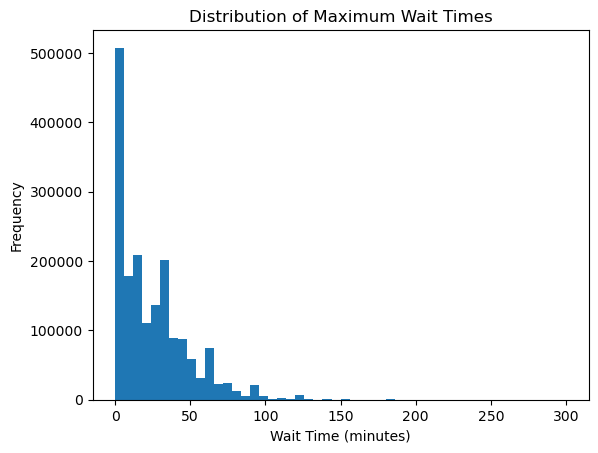

In [ ]:
new_merged_df['WAIT_TIME_MAX'].hist(bins=50, grid=False)
plt.title('Distribution of Maximum Wait Times')
plt.xlabel('Wait Time (minutes)')
plt.ylabel('Frequency')
plt.show()

**In general, the most frequent waiting time is 5 minutes and then are 15 and 30 minutes**

### Distribution of total number GUEST_CARRIED by Attraction

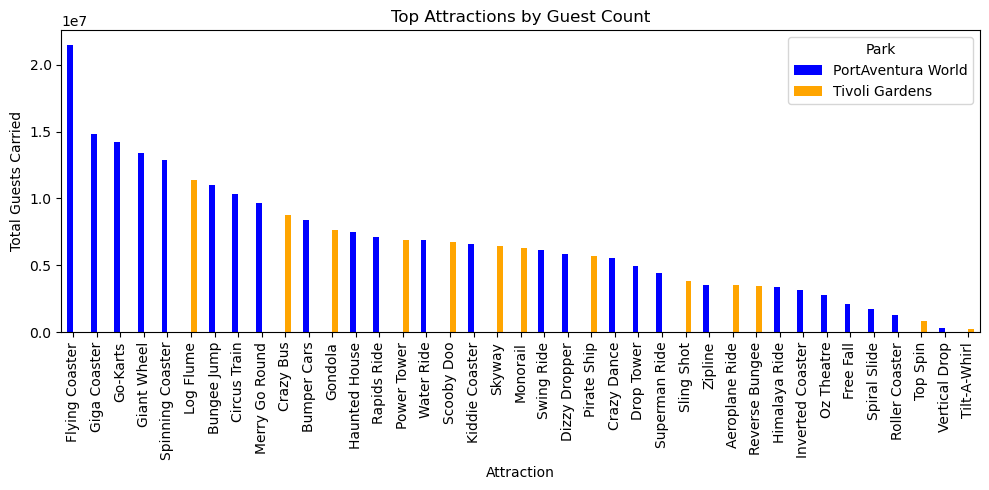

In [ ]:
# Assuming guests_by_attraction_park is a DataFrame resulting from the groupby and unstack operation
# Sort the attractions by the total guests carried in both parks
total_guests_by_attraction = guests_by_attraction_park.sum(axis=1).sort_values(ascending=False)

# Filter the DataFrame to include only the top attractions
top_attractions_data = guests_by_attraction_park.loc[total_guests_by_attraction.index]

# Plot the bar chart for the top attractions with different colors for each park
top_attractions_data.plot(kind='bar', stacked=False, figsize=(10, 5), color=['blue', 'orange'])

plt.title('Top Attractions by Guest Count')
plt.xlabel('Attraction')
plt.ylabel('Total Guests Carried')
plt.legend(title='Park')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit the x-axis labels
plt.show()

**[Flying Coaster, Giga Coaster, Go-Karts] are top 3 attractions which carry the most guests in all-time**

### Yearly Mean Wait Time

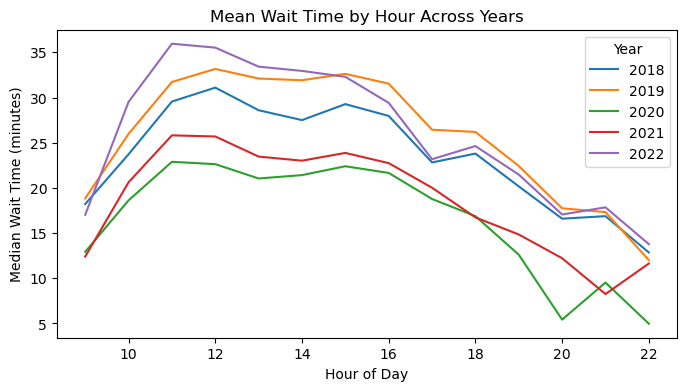

In [ ]:
# Extract the year from 'WORK_DATE'
new_merged_df['YEAR'] = new_merged_df['WORK_DATE'].dt.year

# Group by 'YEAR' and 'DEB_TIME_HOUR', then calculate median 'WAIT_TIME_MAX'
hourly_median_by_year = new_merged_df.groupby(['YEAR', 'DEB_TIME_HOUR'])['WAIT_TIME_MAX'].mean().unstack(level=0)


# Plot the line chart
plt.figure(figsize=(8, 4))
for year in hourly_median_by_year.columns:
    plt.plot(hourly_median_by_year.index, hourly_median_by_year[year], label=year)

plt.title('Mean Wait Time by Hour Across Years')
plt.xlabel('Hour of Day')
plt.ylabel('Median Wait Time (minutes)')
plt.legend(title='Year')
plt.show()

**Actually, Post-Covid period has around 10 mins differences compared to Before-Covid period**  
**In a day, the wait time gradully rise up since open-hour(9:00) and reaches the peak at noon. Afterwards, it gradully decreases until 22:00**

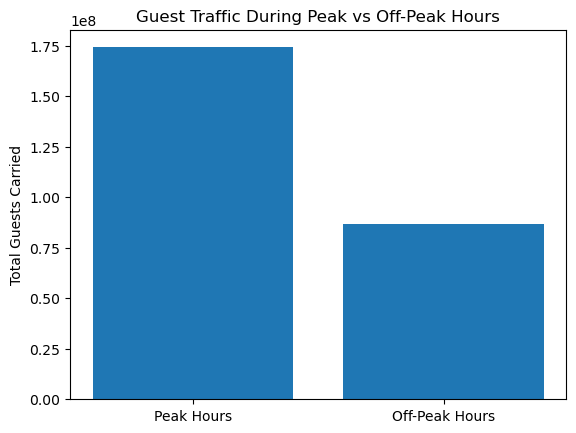

In [ ]:
# Define peak hours (for example, 10 AM to 6 PM)
peak_hours = new_merged_df[(new_merged_df['DEB_TIME_HOUR'] >= 11) & (new_merged_df['DEB_TIME_HOUR'] <= 17)]
off_peak_hours = new_merged_df[(new_merged_df['DEB_TIME_HOUR'] < 11) | (new_merged_df['DEB_TIME_HOUR'] > 17)]

# Calculate total guests
peak_guests = peak_hours['GUEST_CARRIED'].sum()
off_peak_guests = off_peak_hours['GUEST_CARRIED'].sum()

# Plot comparison
plt.bar(['Peak Hours', 'Off-Peak Hours'], [peak_guests, off_peak_guests])
plt.title('Guest Traffic During Peak vs Off-Peak Hours')
plt.ylabel('Total Guests Carried')
plt.show()

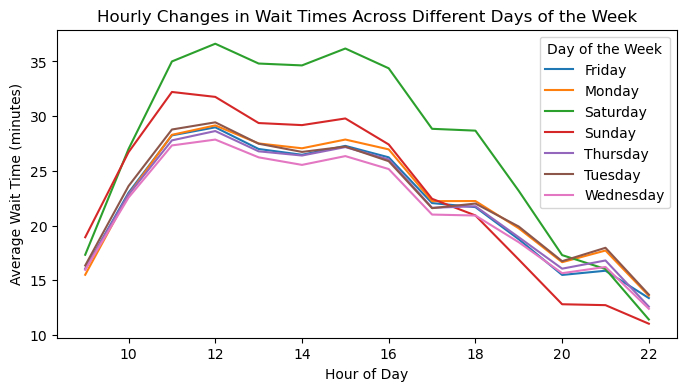

In [ ]:
# Add day of the week column
new_merged_df['DAY_OF_WEEK'] = new_merged_df['WORK_DATE'].dt.day_name()

# Group by 'DAY_OF_WEEK' and 'DEB_TIME_HOUR' and calculate means
weekly_hourly_wait = new_merged_df.groupby(['DAY_OF_WEEK', 'DEB_TIME_HOUR'])['WAIT_TIME_MAX'].mean().unstack(level=0)

# Plot
weekly_hourly_wait.plot(figsize=(8, 4))
plt.title('Hourly Changes in Wait Times Across Different Days of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('Average Wait Time (minutes)')
plt.legend(title='Day of the Week')
plt.show()

**Everyday Trend is the same but weekend tends to have more wait time than weekdays**

### Trend of Top 5 Attractions in PortAventura World

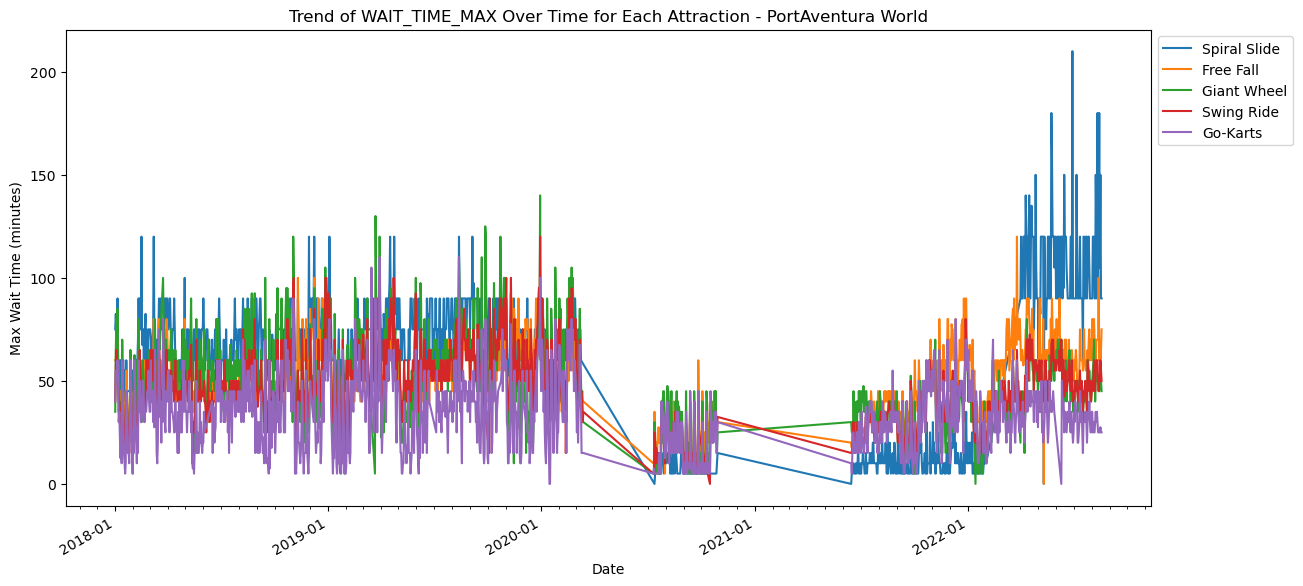

In [ ]:
# First, group by 'ENTITY_DESCRIPTION_SHORT' and 'WORK_DATE', then calculate the median 'WAIT_TIME_MAX'
median_wait_times = new_merged_df[new_merged_df["PARK"] == "PortAventura World"].groupby(['ENTITY_DESCRIPTION_SHORT', 'WORK_DATE'])['WAIT_TIME_MAX'].median().reset_index()

# Now filter out the top 5 attractions based on some criterion, for example, their overall median wait time
top_attractions = median_wait_times.groupby('ENTITY_DESCRIPTION_SHORT')['WAIT_TIME_MAX'].mean().nlargest(5).index

# Filter the median_wait_times DataFrame to only include the top 5 attractions
top_median_wait_times = median_wait_times[median_wait_times['ENTITY_DESCRIPTION_SHORT'].isin(top_attractions)]

fig, ax = plt.subplots(figsize=(14, 7))

for attraction in top_attractions:
    data_to_plot = top_median_wait_times[top_median_wait_times['ENTITY_DESCRIPTION_SHORT'] == attraction]
    ax.plot(data_to_plot['WORK_DATE'], data_to_plot['WAIT_TIME_MAX'], label=attraction)

# Set major and minor ticks locator and format for the x-axis
ax.xaxis.set_major_locator(mdates.YearLocator())   # Major ticks for each year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as Year-Month
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=1, interval=1))  # Minor ticks for each month

# Improve display of tick labels
plt.gcf().autofmt_xdate()  # Auto format to prevent overlap

# Set title and labels
ax.set_title('Trend of WAIT_TIME_MAX Over Time for Each Attraction - PortAventura World')
ax.set_xlabel('Date')
ax.set_ylabel('Max Wait Time (minutes)')

# Display the legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move the legend outside of the plot

# Show the plot with a cleaner x-axis
plt.show()

### Trend of Top 5 Attractions in Tivoli Gardens

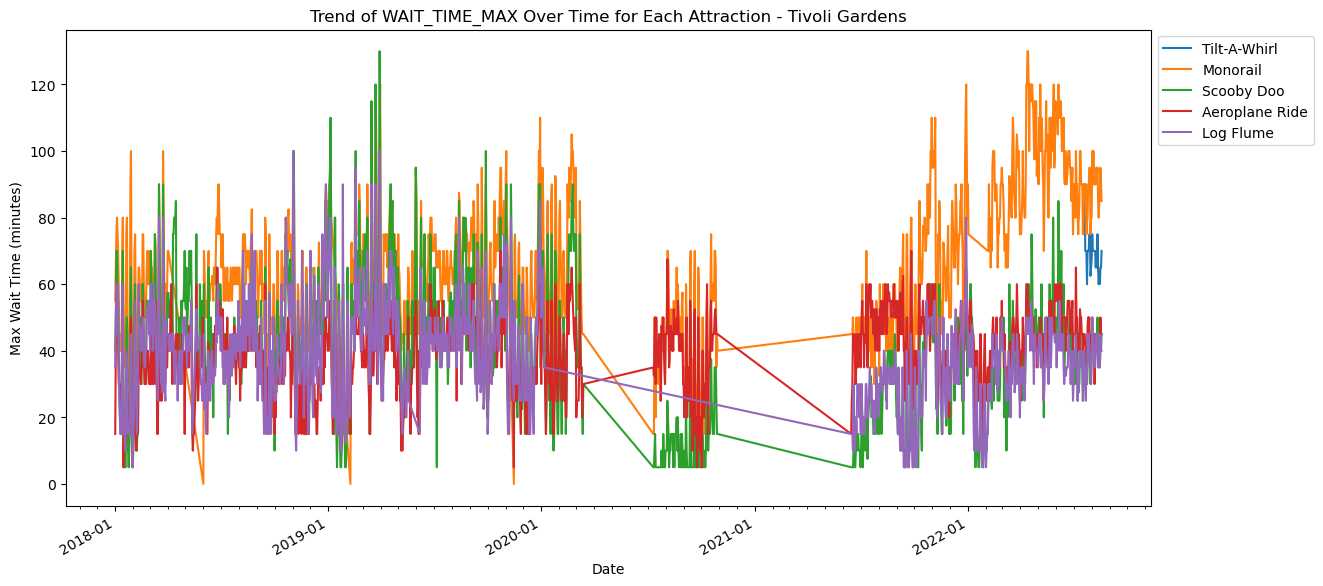

In [ ]:
# First, group by 'ENTITY_DESCRIPTION_SHORT' and 'WORK_DATE', then calculate the median 'WAIT_TIME_MAX'
median_wait_times = new_merged_df[new_merged_df["PARK"] == "Tivoli Gardens"].groupby(['ENTITY_DESCRIPTION_SHORT', 'WORK_DATE'])['WAIT_TIME_MAX'].median().reset_index()

# Now filter out the top 5 attractions based on some criterion, for example, their overall median wait time
top_attractions = median_wait_times.groupby('ENTITY_DESCRIPTION_SHORT')['WAIT_TIME_MAX'].mean().nlargest(5).index

# Filter the median_wait_times DataFrame to only include the top 5 attractions
top_median_wait_times = median_wait_times[median_wait_times['ENTITY_DESCRIPTION_SHORT'].isin(top_attractions)]

fig, ax = plt.subplots(figsize=(14, 7))

for attraction in top_attractions:
    data_to_plot = top_median_wait_times[top_median_wait_times['ENTITY_DESCRIPTION_SHORT'] == attraction]
    ax.plot(data_to_plot['WORK_DATE'], data_to_plot['WAIT_TIME_MAX'], label=attraction)

# Set major and minor ticks locator and format for the x-axis
ax.xaxis.set_major_locator(mdates.YearLocator())   # Major ticks for each year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as Year-Month
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=1, interval=1))  # Minor ticks for each month

# Improve display of tick labels
plt.gcf().autofmt_xdate()  # Auto format to prevent overlap

# Set title and labels
ax.set_title('Trend of WAIT_TIME_MAX Over Time for Each Attraction - Tivoli Gardens')
ax.set_xlabel('Date')
ax.set_ylabel('Max Wait Time (minutes)')

# Display the legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move the legend outside of the plot

# Show the plot with a cleaner x-axis
plt.show()

## Merge again with weather data

In [ ]:
# Create a 'date' column and an 'hour' column from 'dt_iso'
weather_data_df['date'] = weather_data_df['dt_iso'].dt.date
weather_data_df['hour'] = weather_data_df['dt_iso'].dt.hour

new_merged_df['date'] = new_merged_df['DEB_TIME'].dt.date
new_merged_df['hour'] = new_merged_df['DEB_TIME'].dt.hour

# Perform the merge
new_merged_weather_df = pd.merge(
    left=new_merged_df,
    right=weather_data_df,
    left_on=['date', 'hour'],
    right_on=['date', 'hour'],
    how='left'
)

In [ ]:
new_merged_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1790295 entries, 0 to 1790294
Data columns (total 30 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   WORK_DATE                 datetime64[ns]
 1   DEB_TIME                  datetime64[ns]
 2   DEB_TIME_HOUR             int64         
 3   FIN_TIME                  object        
 4   ENTITY_DESCRIPTION_SHORT  object        
 5   WAIT_TIME_MAX             int64         
 6   NB_UNITS                  float64       
 7   GUEST_CARRIED             float64       
 8   CAPACITY                  float64       
 9   ADJUST_CAPACITY           float64       
 10  OPEN_TIME                 int64         
 11  UP_TIME                   int64         
 12  DOWNTIME                  int64         
 13  NB_MAX_UNIT               float64       
 14  REF_CLOSING_DESCRIPTION   object        
 15  PARK                      object        
 16  YEAR                      int32         
 17  DAY_OF_W

In [ ]:
new_merged_weather_df.head()

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,...,dt,dt_iso,temp,dew_point,feels_like,humidity,rain_1h,snow_1h,weather_main,weather_description
0,2018-01-01,2018-01-01 19:30:00,19,2018-01-01 19:45:00.000,Bumper Cars,5,18.0,148.0,254.749,254.75,...,1514833200,2018-01-01 19:00:00,7.28,4.59,3.03,83,NaN,NaN,Clouds,few clouds
1,2018-01-01,2018-01-01 12:45:00,12,2018-01-01 13:00:00.000,Crazy Dance,5,1.0,46.0,250.001,250.00,...,1514808000,2018-01-01 12:00:00,7.77,6.71,3.28,93,0.92,NaN,Rain,light rain
2,2018-01-01,2018-01-01 17:00:00,17,2018-01-01 17:15:00.000,Skyway,5,15.0,92.0,211.500,198.25,...,1514826000,2018-01-01 17:00:00,7.76,5.57,3.30,86,0.25,NaN,Rain,light rain
3,2018-01-01,2018-01-01 13:30:00,13,2018-01-01 13:45:00.000,Monorail,70,11.0,145.0,223.751,223.75,...,1514811600,2018-01-01 13:00:00,8.34,7.28,4.22,93,0.82,NaN,Rain,light rain
4,2018-01-01,2018-01-01 15:00:00,15,2018-01-01 15:15:00.000,Roller Coaster,20,2.0,51.0,75.000,75.00,...,1514818800,2018-01-01 15:00:00,8.07,5.70,3.99,85,2.34,NaN,Rain,moderate rain


### Distribution of Weather

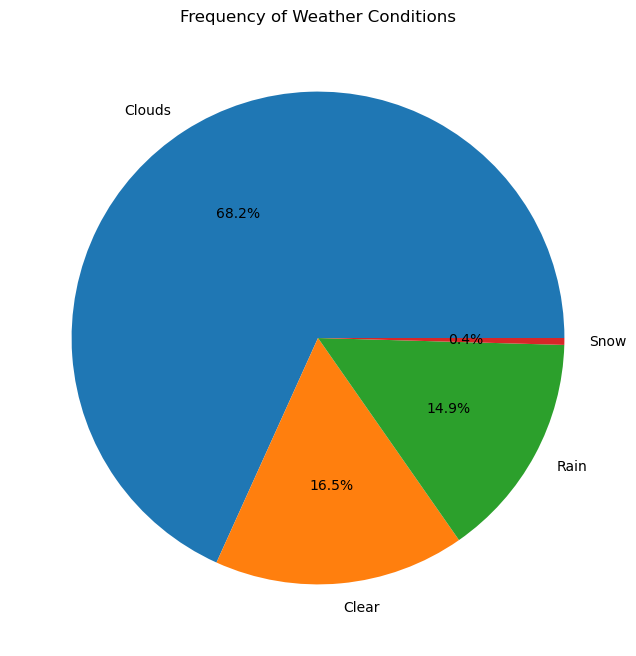

In [ ]:
weather_condition_counts = new_merged_weather_df['weather_main'].value_counts()

weather_condition_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Frequency of Weather Conditions')
plt.ylabel('')  # Hide the y-label
plt.show()

### Wait Time by Weather Condition and Hour

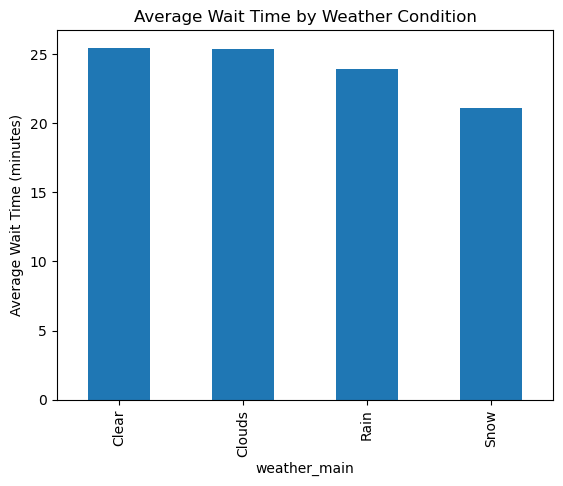

In [ ]:
# Categorize weather conditions
wait_times_weather = new_merged_weather_df.groupby('weather_main')['WAIT_TIME_MAX'].mean()

wait_times_weather.plot(kind='bar')
plt.ylabel('Average Wait Time (minutes)')
plt.title('Average Wait Time by Weather Condition')
plt.show()

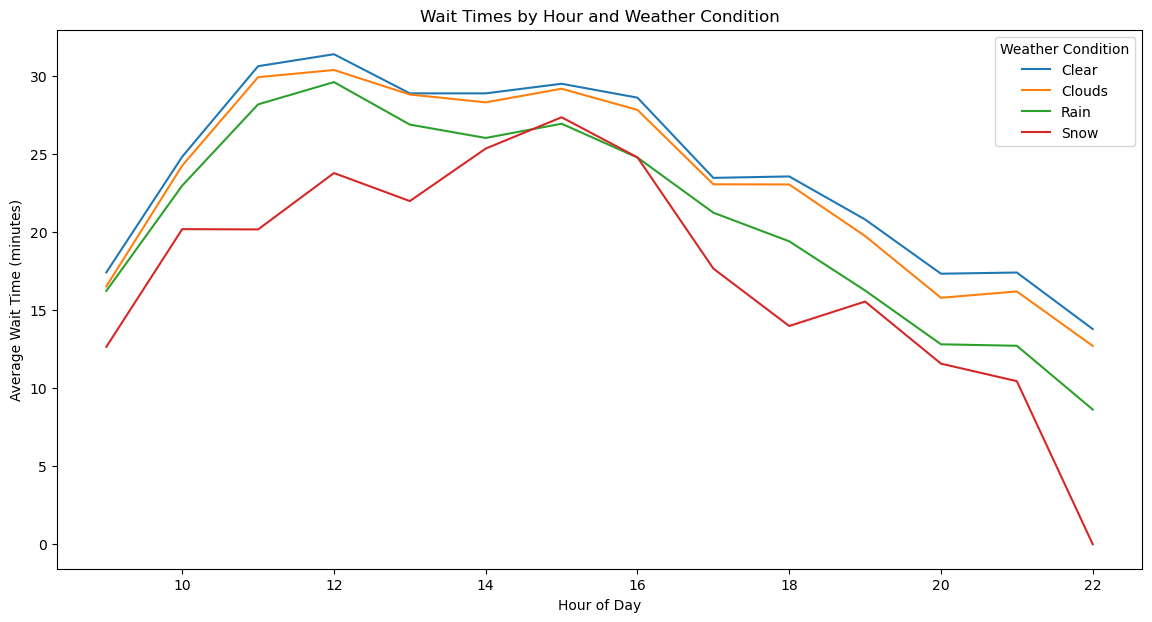

In [ ]:
# Assuming 'hour' and 'weather_main' are columns in new_merged_df
pivot_table = new_merged_weather_df.pivot_table(values='WAIT_TIME_MAX', index='hour', columns='weather_main', aggfunc='mean')

pivot_table.plot(kind='line', figsize=(14, 7))
plt.title('Wait Times by Hour and Weather Condition')
plt.xlabel('Hour of Day')
plt.ylabel('Average Wait Time (minutes)')
plt.legend(title='Weather Condition')
plt.show()

## Merge again with attendance data and Parade Data

In [ ]:
# Convert 'USAGE_DATE' to datetime in attendance_df
attendance_df['USAGE_DATE'] = pd.to_datetime(attendance_df['USAGE_DATE'])

# Rename columns in attendance_df to match those in new_merged_weather_df for merging
attendance_df.rename(columns={'USAGE_DATE': 'WORK_DATE', 'FACILITY_NAME': 'PARK'}, inplace=True)

# Perform the left join merge
final_merged_df = pd.merge(
    new_merged_weather_df,
    attendance_df,
    on=['WORK_DATE', 'PARK'],
    how='left'
)

In [ ]:
attendance_df["WORK_DATE"] == "2018-01-01"

,WORK_DATE,PARK,attendance
0,2018-06-01,PortAventura World,46804
1,2018-06-01,Tivoli Gardens,20420
2,2018-06-02,PortAventura World,57940
3,2018-06-02,Tivoli Gardens,29110
4,2018-06-03,PortAventura World,44365
...,...,...,...
2362,2022-07-24,Tivoli Gardens,26798
2363,2022-07-25,PortAventura World,53764
2364,2022-07-25,Tivoli Gardens,27061
2365,2022-07-26,PortAventura World,26391


In [ ]:
final_merged_df.head()

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,...,dt_iso,temp,dew_point,feels_like,humidity,rain_1h,snow_1h,weather_main,weather_description,attendance
0,2018-01-01,2018-01-01 19:30:00,19,2018-01-01 19:45:00.000,Bumper Cars,5,18.0,148.0,254.749,254.75,...,2018-01-01 19:00:00,7.28,4.59,3.03,83,NaN,NaN,Clouds,few clouds,NaN
1,2018-01-01,2018-01-01 12:45:00,12,2018-01-01 13:00:00.000,Crazy Dance,5,1.0,46.0,250.001,250.00,...,2018-01-01 12:00:00,7.77,6.71,3.28,93,0.92,NaN,Rain,light rain,NaN
2,2018-01-01,2018-01-01 17:00:00,17,2018-01-01 17:15:00.000,Skyway,5,15.0,92.0,211.500,198.25,...,2018-01-01 17:00:00,7.76,5.57,3.30,86,0.25,NaN,Rain,light rain,NaN
3,2018-01-01,2018-01-01 13:30:00,13,2018-01-01 13:45:00.000,Monorail,70,11.0,145.0,223.751,223.75,...,2018-01-01 13:00:00,8.34,7.28,4.22,93,0.82,NaN,Rain,light rain,NaN
4,2018-01-01,2018-01-01 15:00:00,15,2018-01-01 15:15:00.000,Roller Coaster,20,2.0,51.0,75.000,75.00,...,2018-01-01 15:00:00,8.07,5.70,3.99,85,2.34,NaN,Rain,moderate rain,NaN


In [ ]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1790295 entries, 0 to 1790294
Data columns (total 31 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   WORK_DATE                 datetime64[ns]
 1   DEB_TIME                  datetime64[ns]
 2   DEB_TIME_HOUR             int64         
 3   FIN_TIME                  object        
 4   ENTITY_DESCRIPTION_SHORT  object        
 5   WAIT_TIME_MAX             int64         
 6   NB_UNITS                  float64       
 7   GUEST_CARRIED             float64       
 8   CAPACITY                  float64       
 9   ADJUST_CAPACITY           float64       
 10  OPEN_TIME                 int64         
 11  UP_TIME                   int64         
 12  DOWNTIME                  int64         
 13  NB_MAX_UNIT               float64       
 14  REF_CLOSING_DESCRIPTION   object        
 15  PARK                      object        
 16  YEAR                      int32         
 17  DAY_OF_W

In [ ]:
final_merged_df.head()

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,...,humidity,rain_1h,snow_1h,weather_main,weather_description,attendance,Unnamed: 0,NIGHT_SHOW,PARADE_1,PARADE_2
0,2018-01-01,2018-01-01 19:30:00,19,2018-01-01 19:45:00.000,Bumper Cars,5,18.0,148.0,254.749,254.75,...,83,NaN,NaN,Clouds,few clouds,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,2018-01-01 12:45:00,12,2018-01-01 13:00:00.000,Crazy Dance,5,1.0,46.0,250.001,250.00,...,93,0.92,NaN,Rain,light rain,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,2018-01-01 17:00:00,17,2018-01-01 17:15:00.000,Skyway,5,15.0,92.0,211.500,198.25,...,86,0.25,NaN,Rain,light rain,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,2018-01-01 13:30:00,13,2018-01-01 13:45:00.000,Monorail,70,11.0,145.0,223.751,223.75,...,93,0.82,NaN,Rain,light rain,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,2018-01-01 15:00:00,15,2018-01-01 15:15:00.000,Roller Coaster,20,2.0,51.0,75.000,75.00,...,85,2.34,NaN,Rain,moderate rain,NaN,NaN,NaN,NaN,NaN


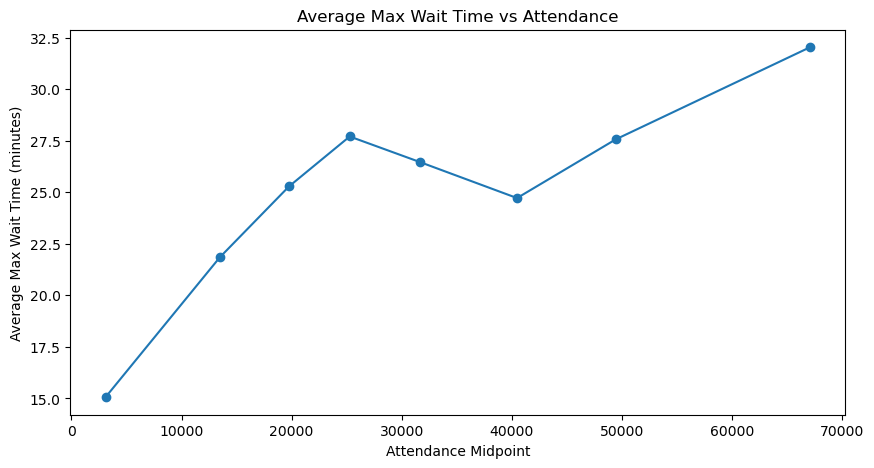

In [ ]:
# Bin the attendance into categories
attendance_bins = pd.qcut(final_merged_df['attendance'], q=8, duplicates='drop')  # creates 8 quantiles

# Calculate the average WAIT_TIME_MAX for each attendance bin
avg_wait_time_by_attendance = final_merged_df.groupby(attendance_bins)['WAIT_TIME_MAX'].mean()

# Reset index to turn Series into DataFrame for plotting
avg_wait_time_by_attendance_df = avg_wait_time_by_attendance.reset_index()

# Calculate the midpoint of each interval for plotting
avg_wait_time_by_attendance_df['attendance_mid'] = avg_wait_time_by_attendance_df['attendance'].apply(lambda x: x.mid)

# Plot the line chart using midpoints
plt.figure(figsize=(10, 5))
plt.plot(avg_wait_time_by_attendance_df['attendance_mid'], avg_wait_time_by_attendance_df['WAIT_TIME_MAX'], marker='o')
plt.title('Average Max Wait Time vs Attendance')
plt.xlabel('Attendance Midpoint')
plt.ylabel('Average Max Wait Time (minutes)')
plt.show()

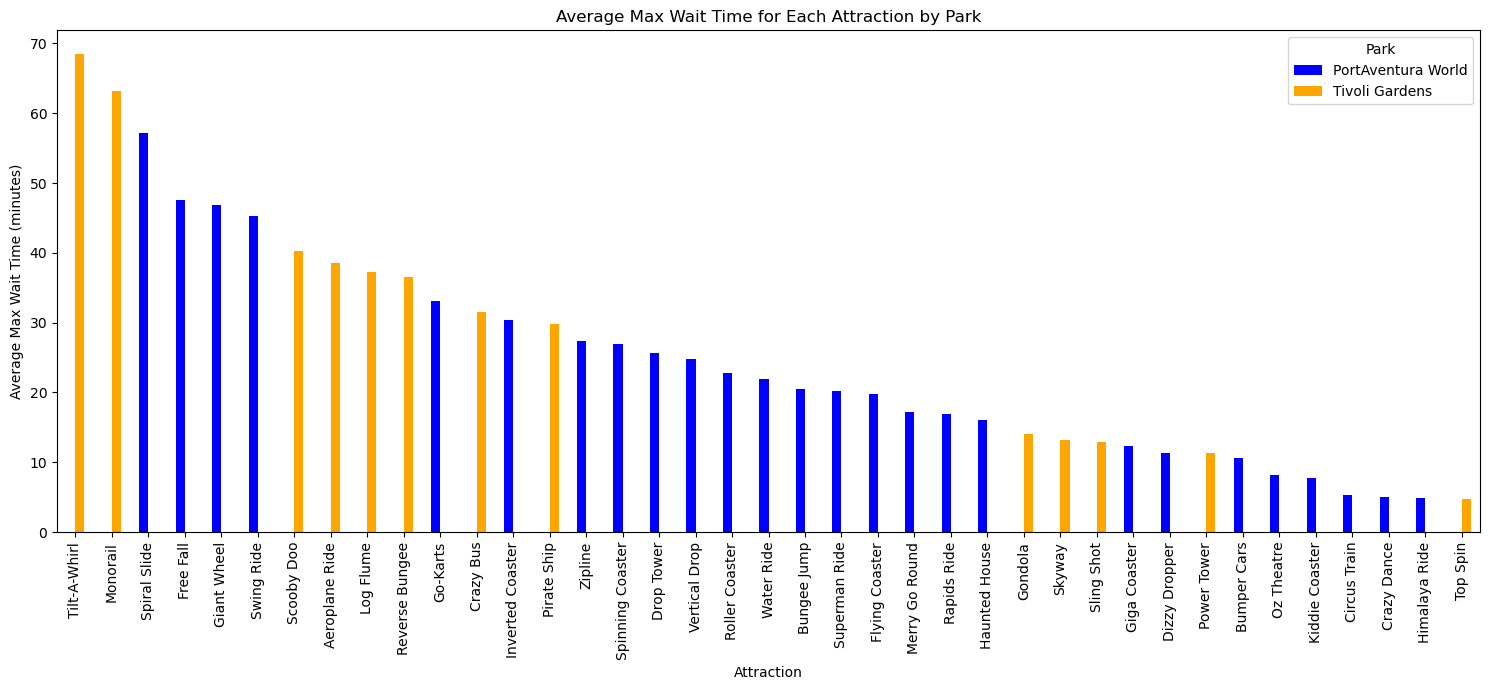

In [ ]:
# Calculate the average WAIT_TIME_MAX for each attraction grouped by PARK
avg_wait_by_attraction_park = final_merged_df.groupby(['ENTITY_DESCRIPTION_SHORT', 'PARK'])['WAIT_TIME_MAX'].mean().reset_index()

# Sort by average wait time in descending order
avg_wait_by_attraction_park.sort_values(by='WAIT_TIME_MAX', ascending=False, inplace=True)

# Use pivot to reshape for plotting
pivot_avg_wait = avg_wait_by_attraction_park.pivot(index='ENTITY_DESCRIPTION_SHORT', columns='PARK', values='WAIT_TIME_MAX')

# Define colors for each park
colors = ['blue', 'orange']

# Fill NaN values with zero
pivot_avg_wait_filled = pivot_avg_wait.fillna(0)

# Calculate a combined average wait time for sorting
pivot_avg_wait_filled['Combined_Avg_Wait'] = pivot_avg_wait_filled.mean(axis=1)

# Sort by 'Combined_Avg_Wait' in descending order
pivot_avg_wait_sorted = pivot_avg_wait_filled.sort_values('Combined_Avg_Wait', ascending=False).drop('Combined_Avg_Wait', axis=1)

# Plot the sorted bars for each park
pivot_avg_wait_sorted.plot(kind='bar', color=colors, figsize=(15, 7))

# Setting plot title and labels
plt.title('Average Max Wait Time for Each Attraction by Park')
plt.xlabel('Attraction')
plt.ylabel('Average Max Wait Time (minutes)')

# Rotate the x-axis labels to prevent overlap
plt.xticks(rotation=90)

# Show legend and tight layout
plt.legend(title='Park')
plt.tight_layout()
plt.show()

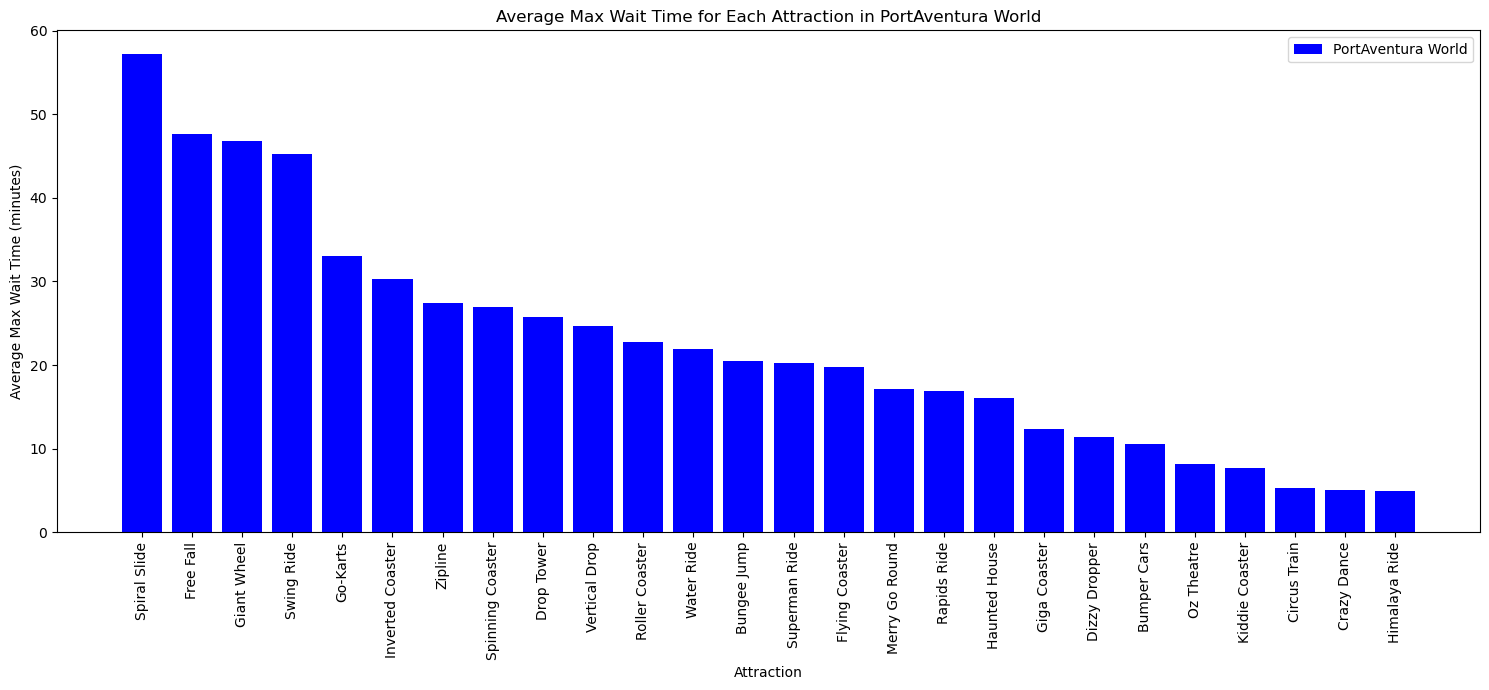

In [ ]:
# Create a copy of the slice for PortAventura World
portaventura_world_wait_times = avg_wait_by_attraction_park[avg_wait_by_attraction_park["PARK"] == "PortAventura World"].copy()

# Sort the values in the copy
portaventura_world_wait_times.sort_values(by='WAIT_TIME_MAX', ascending=False, inplace=True)

plt.figure(figsize=(15, 7))

# Plot PortAventura World bars
plt.bar(portaventura_world_wait_times['ENTITY_DESCRIPTION_SHORT'],
        portaventura_world_wait_times['WAIT_TIME_MAX'],
        color="blue",
        label='PortAventura World')

plt.title('Average Max Wait Time for Each Attraction in PortAventura World')
plt.xlabel('Attraction')
plt.ylabel('Average Max Wait Time (minutes)')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Output Final Merge Table into csv

In [ ]:
new_final_merged_df = pd.merge(
    final_merged_df,
    parade_night_show_df,
    on='WORK_DATE',
    how='left'
)

In [ ]:
new_final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1790295 entries, 0 to 1790294
Data columns (total 35 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   WORK_DATE                 datetime64[ns]
 1   DEB_TIME                  datetime64[ns]
 2   DEB_TIME_HOUR             int64         
 3   FIN_TIME                  object        
 4   ENTITY_DESCRIPTION_SHORT  object        
 5   WAIT_TIME_MAX             int64         
 6   NB_UNITS                  float64       
 7   GUEST_CARRIED             float64       
 8   CAPACITY                  float64       
 9   ADJUST_CAPACITY           float64       
 10  OPEN_TIME                 int64         
 11  UP_TIME                   int64         
 12  DOWNTIME                  int64         
 13  NB_MAX_UNIT               float64       
 14  REF_CLOSING_DESCRIPTION   object        
 15  PARK                      object        
 16  YEAR                      int32         
 17  DAY_OF_W

In [ ]:
new_final_merged_df.to_csv('/Users/Wayne/Desktop/CentraleSupelec & ESSEC/Lecture/M2/M2_T2/Hackathon/final_merge_data.csv', index=False)